# Dermatology

In [1]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names

Nothing to do - goodbye
Nothing to do - goodbye


# Data Wrangling

In [4]:
names = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon',
         'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement',
         'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis',
         'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
         'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis',
         'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug',
         'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age', 'class']

In [5]:
data = pd.read_csv("dermatology.data", sep=",", names=names)


Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

Replace the "?" in Age attribute with NaA, and then convert it to integer.

In [7]:
data["Age"].replace('?', np.nan, inplace=True)
data['Age'] = pd.to_numeric(data['Age']).astype('Int64')

In [8]:
data.set_index("patient_id", inplace=True)

In [9]:
data.to_csv("dermatology_prepared.csv")

## ehrapy sanity check

In [10]:
adata = ep.io.read_csv("dermatology_prepared.csv",
                   index_column="patient_id")
edata = ed.EHRData.from_adata(adata=adata)

In [11]:
ep.ad.feature_type_overview(edata)

! Features 'erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'class' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.


! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


 Detected feature types for AnnData object with 366 obs and 35 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╚══ Age
╚══ 🗂️ Categorical features
    ╠══ PNL infiltrate (4 categories)
    ╠══ acanthosis (4 categories)
    ╠══ band-like infiltrate (4 categories)
    ╠══ class (6 categories)
    ╠══ clubbing of the rete ridges (4 categories)
    ╠══ definite borders (4 categories)
    ╠══ disappearance of the granular layer (4 categories)
    ╠══ elongation of the rete ridges (4 categories)
    ╠══ eosinophils in the infiltrate (3 categories)
    ╠══ erythema (4 categories)
    ╠══ exocytosis (4 categories)
    ╠══ family history (2 categories)
    ╠══ fibrosis of the papillary dermis (4 categories)
    ╠══ focal hypergranulosis (4 categories)
    ╠══ follicular horn plug (4 categories)
    ╠══ follicular papules (4 categories)
    ╠══ hyperkeratosis (4 categories)
    ╠══ inflammatory monoluclear inflitrate (4 categories)
    ╠══ itching (4 categories)
    ╠══ knee and elbow involvement (4 categories)
    ╠══ koebner phenomenon (4 categories)
    ╠══ melanin incontinence (4 categories)
    ╠══ munro microabcess (4 categories)
    ╠══ oral mucosal involvement (4 categories)
    ╠══ parakeratosis (4 categories)
    ╠══ perifollicular parakeratosis (4 categories)
    ╠══ polygonal papules (4 categories)
    ╠══ saw-tooth appearance of retes (4 categories)
    ╠══ scaling (4 categories)
    ╠══ scalp involvement (4 categories)
    ╠══ spongiform pustule (4 categories)
    ╠══ spongiosis (4 categories)
    ╠══ thinning of the suprapapillary epidermis (4 categories)
    ╚══ vacuolisation and damage of basal layer (4 categories)

In [12]:
_ = ep.pp.qc_metrics(edata)

In [13]:
edata.obs

,missing_values_abs,missing_values_pct
patient_id,,
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
...,...,...
362,0,0.0
363,0,0.0
364,0,0.0


In [14]:
edata.var

,feature_type,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max,iqr_outliers
erythema,categorical,0,0.000000,2.068306,2.0,0.663844,0.0,3.0,True
scaling,categorical,0,0.000000,1.795082,2.0,0.700568,0.0,3.0,False
definite borders,categorical,0,0.000000,1.549180,2.0,0.906285,0.0,3.0,False
itching,categorical,0,0.000000,1.366120,1.0,1.136743,0.0,3.0,False
koebner phenomenon,categorical,0,0.000000,0.633880,0.0,0.906775,0.0,3.0,True
polygonal papules,categorical,0,0.000000,0.448087,0.0,0.956019,0.0,3.0,True
follicular papules,categorical,0,0.000000,0.166667,0.0,0.569808,0.0,3.0,True
oral mucosal involvement,categorical,0,0.000000,0.377049,0.0,0.833006,0.0,3.0,True
knee and elbow involvement,categorical,0,0.000000,0.614754,0.0,0.981635,0.0,3.0,True
scalp involvement,categorical,0,0.000000,0.519126,0.0,0.904400,0.0,3.0,True


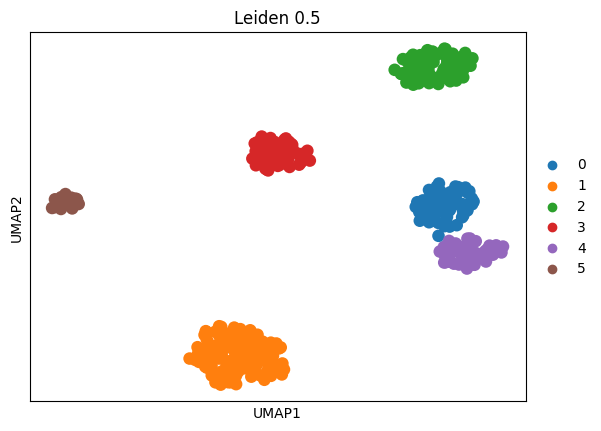

In [15]:
ep.pp.knn_impute(edata)
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

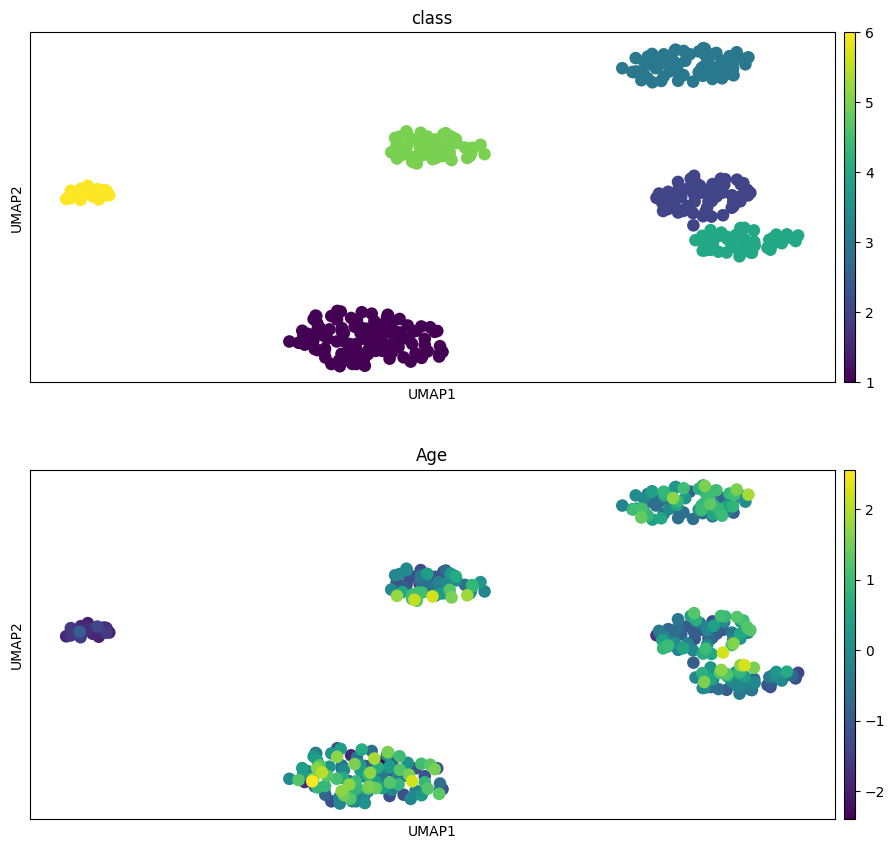

In [16]:
ep.pl.umap(edata, color=["class", "Age"], ncols=1, wspace=0.75)